# Multivariate normal distributions

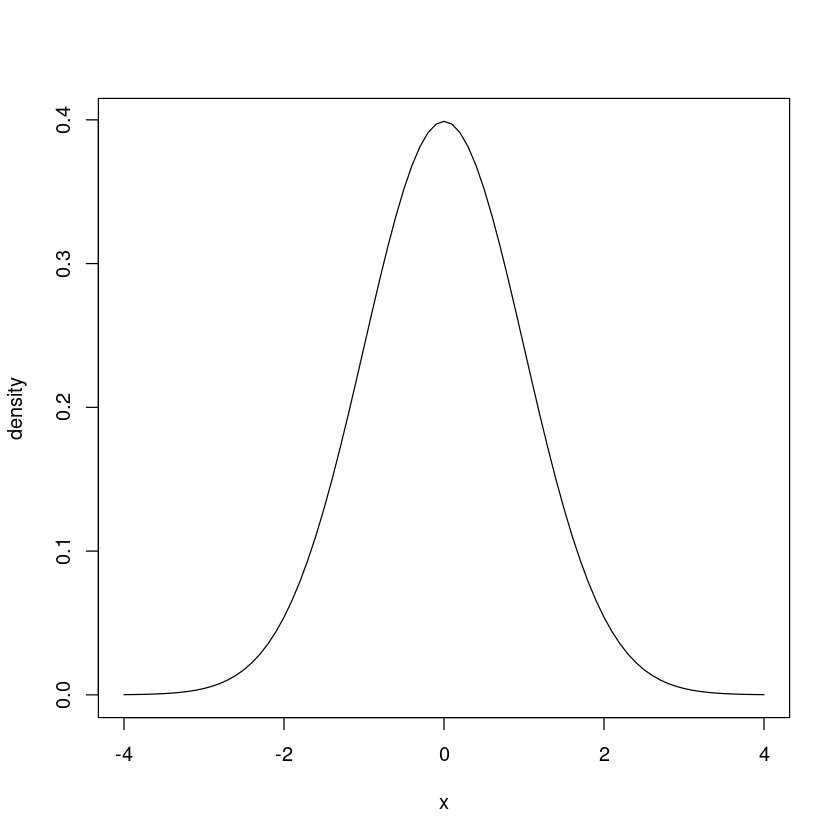

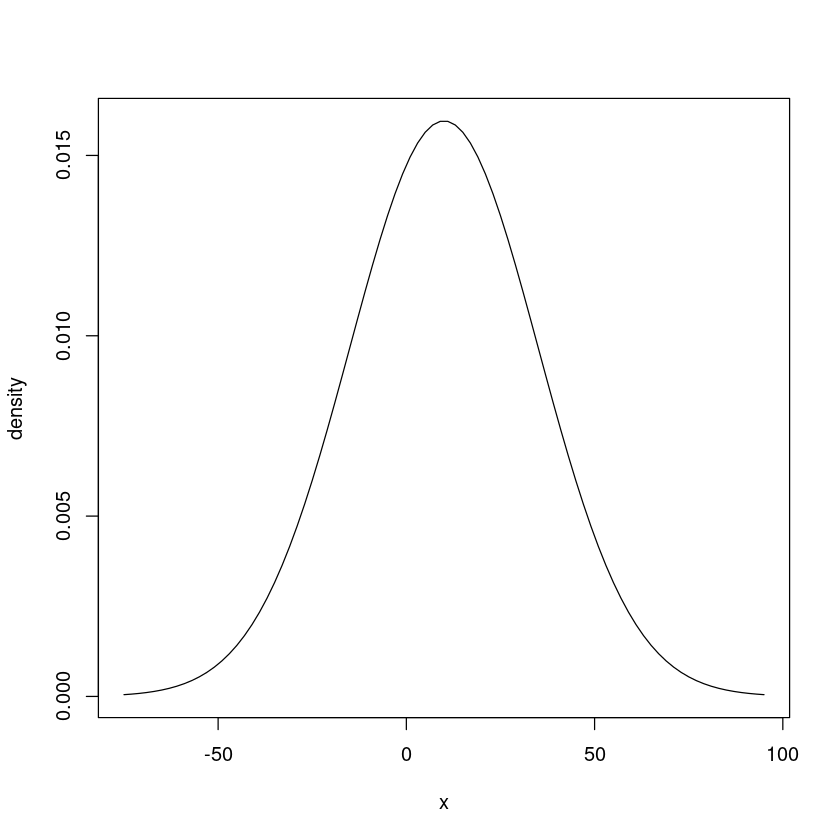

In [1]:
 #Plot the probability density a normal distribution
#Standard normal Z: a normal distribution with a mean of zero and a standard


x = seq( -4, 4, by =0.1 )


#To calculate the normal probability density over x
#?dnorm
density= dnorm(x, mean = 0, sd = 1)
plot(x, density, type = "l")


#plot of a normal distribution with a mean of 10 and a standard deviation of 2
x = seq( -75, 95, by =2 )


#To calculate the normal probability density over x
#?dnorm
density= dnorm(x, mean = 10, sd = 25)
plot(x, density, type = "l")

https://bookdown.org/ndphillips/YaRrr/

# Normality check


In [13]:

lc = "../DASC5323/Chapter1/Bumpus_sparrows.csv"

dat = read.csv(lc, header = TRUE)

head(dat)

,Survivorship,Total_length,Alar_extent,L_beak_head,L_humerous,L_keel_sternum
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,S,156,245,31.6,18.5,20.5
2,S,154,240,30.4,17.9,19.6
3,S,153,240,31.0,18.4,20.6
4,S,153,236,30.9,17.7,20.2
5,S,155,243,31.5,18.6,20.3
6,S,163,247,32.0,19.0,20.9


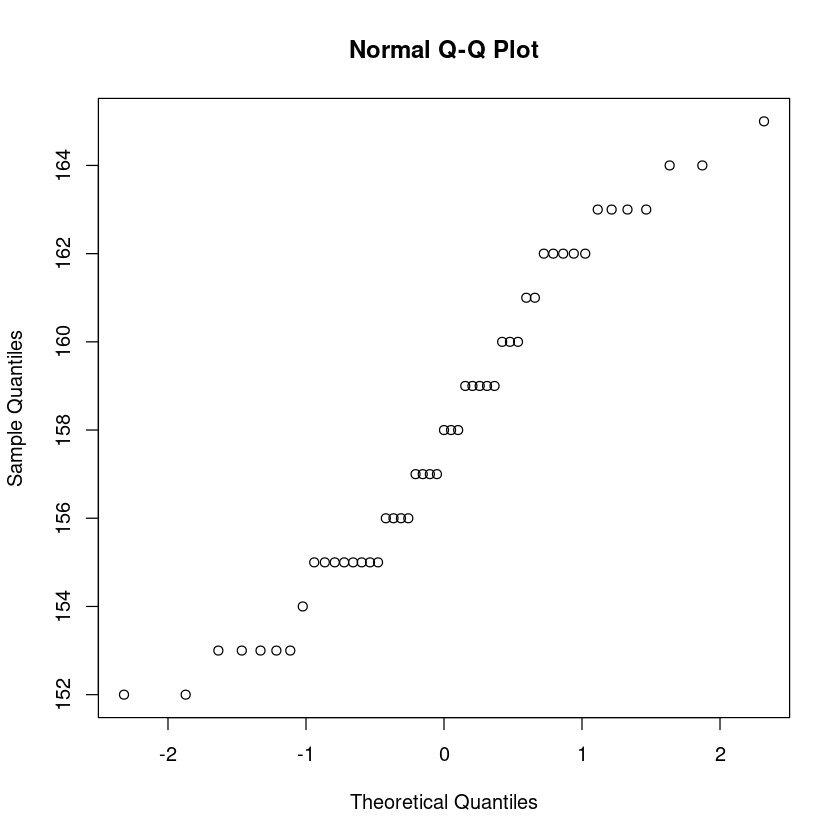

In [3]:
qqnorm(dat$Total_length)

#The points on the qq normal plot roughly follow a straight line, 
#and it is reasonable to assume that the data are from a normal distribution approximately.

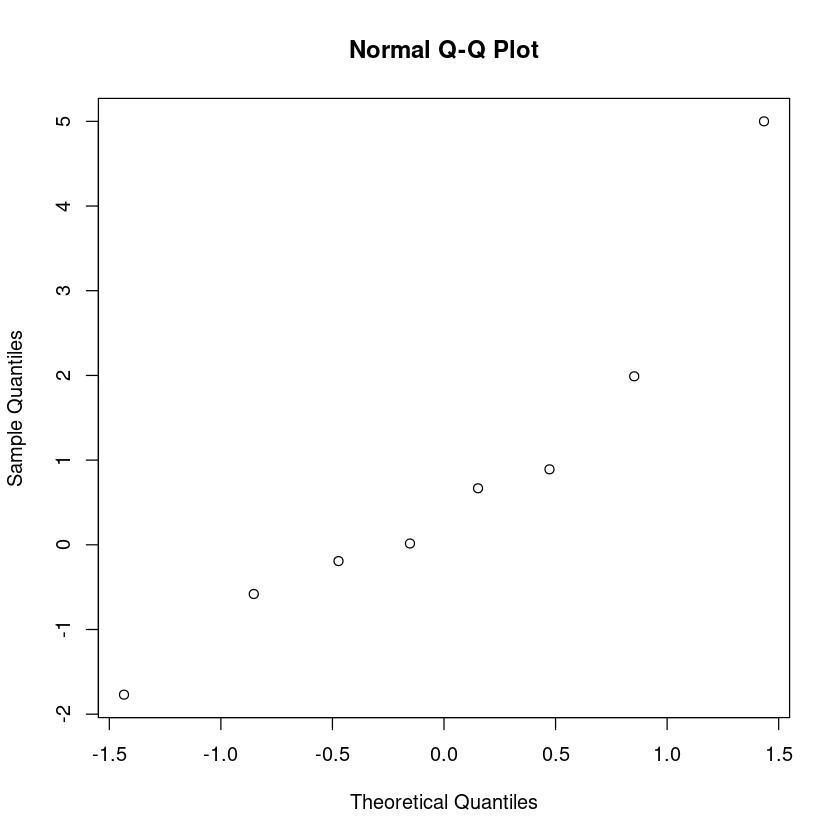

In [4]:
# A few more qq normal plots

x = rnorm(8)
x[7]=5
qqnorm(x)

#the sample 

# Example :  Counstruct qq normal plots for all variables

In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
dat %>% gather()%>%ggplot(.,aes(sample=value))+stat_qq()+facet_wrap

ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `facet_wrap` to a [34m<ggplot>[39m object
[36mℹ[39m Did you forget to add parentheses, as in `facet_wrap()`?


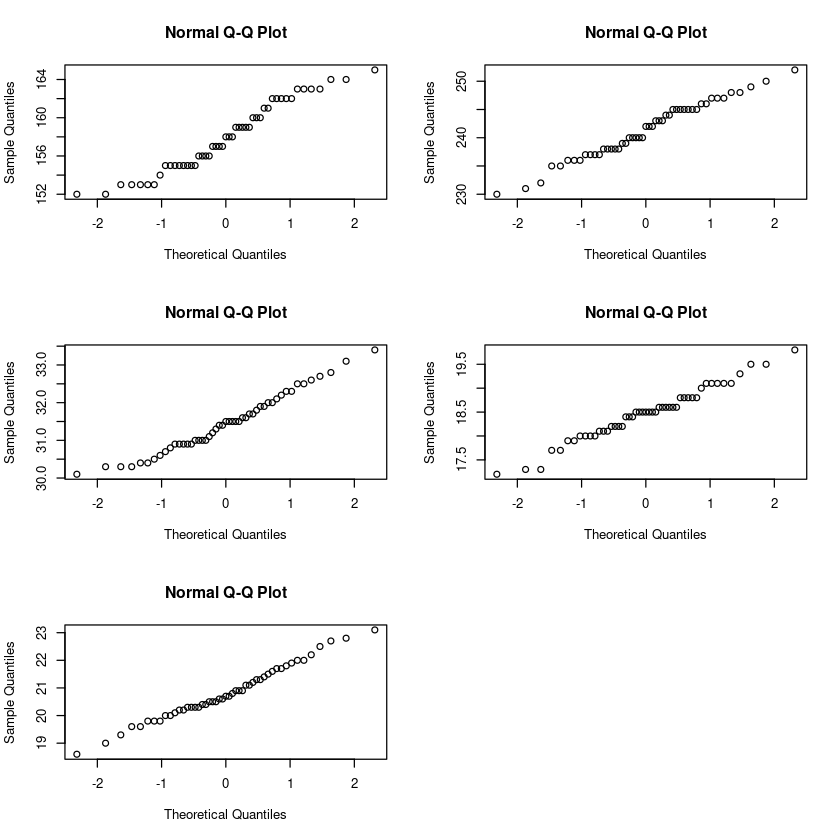

In [7]:
#Make a few qq normal plots in one page

par(mfrow = c(3,2)) #create a 3*2 plotting matrix

for (i in 2:6)
{qqnorm(dat[,i])
}

#All variables seem from normal distributions.

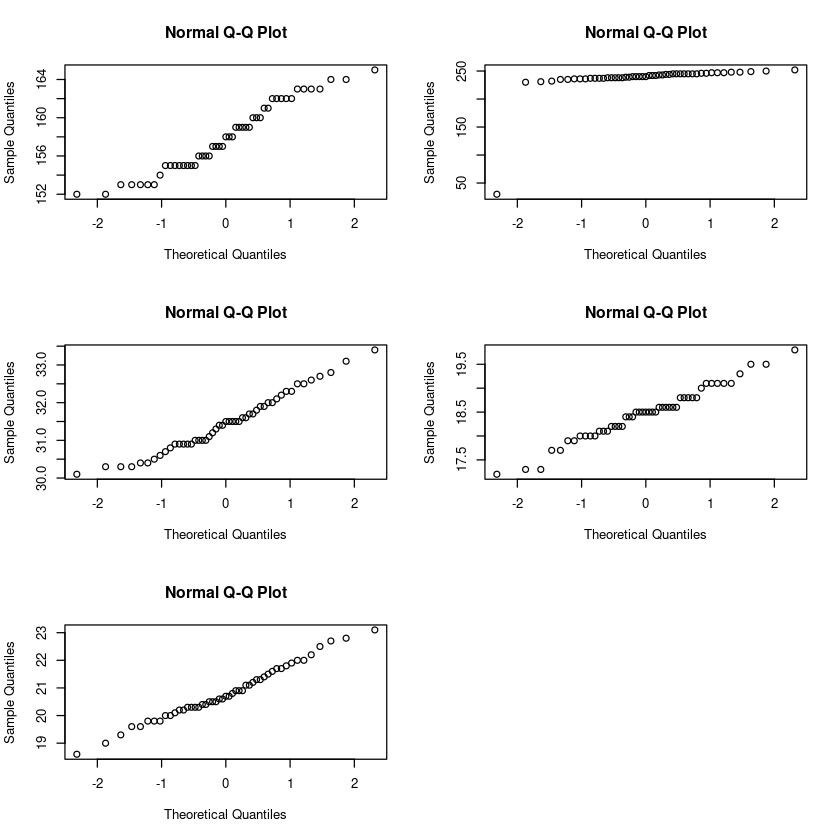

In [8]:
#Make a few qq normal plots in one page

dat[5,3] = 30
par(mfrow = c(3,2)) #create a 3*2 plotting matrix

#for(i in c(2,5,6))

for (i in 2:6)
{
    qqnorm(dat[,i])
}

# the second variable is not from a normal distribution.

# Multivariate normal distribution 



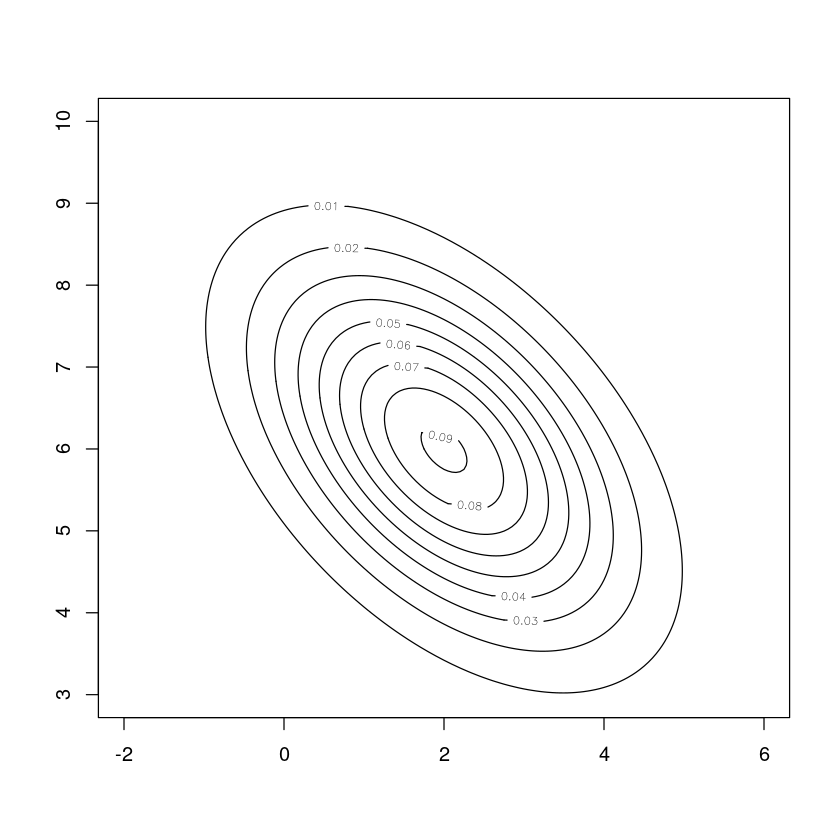

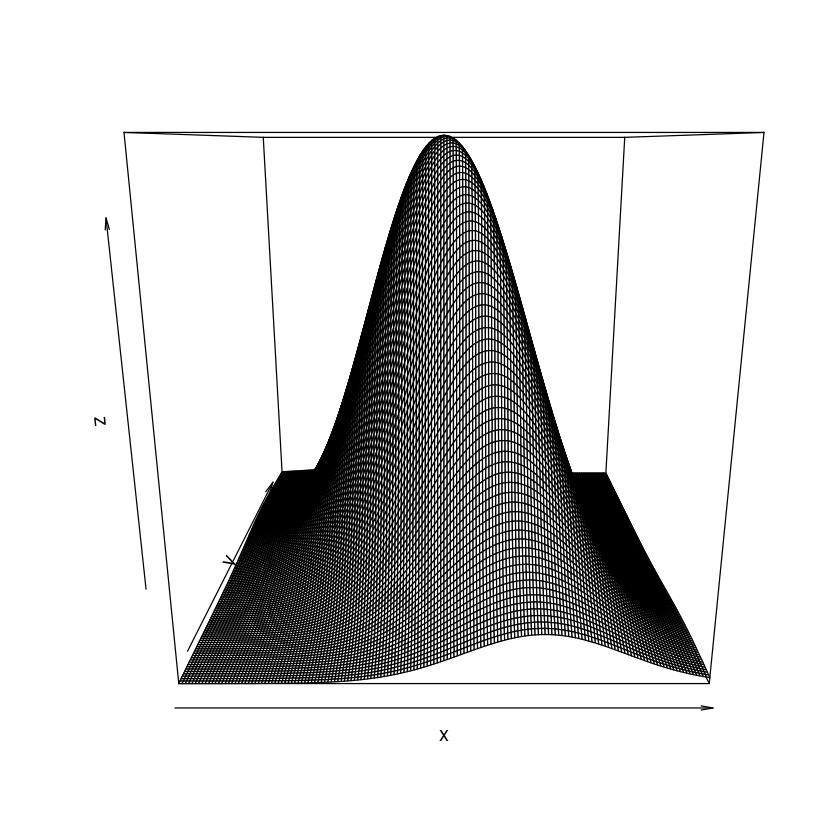

In [14]:
#Plot a bivariate normal distribution
#Example: the mean vector of the bivariate normal is (2,6)
# the covariance matrix is given below in the code

library(mvtnorm)

#A bivariate normal distribution

x = seq(-2, 6, 0.05)
y = seq(3, 10, 0.05)

#specified by mean and the covariance matrix sigma.

mu = c(2, 6)
sigma0 = matrix(c(2, -1, -1, 2), nrow=2)

#dmvnorm computes the density function of the multivariate normal
#dmvnorm(x, mean = mu, sigma = sigma0, log = FALSE, checkSymmetry = TRUE)

f = function(x, y) dmvnorm(cbind(x, y), mu, sigma0)
z = outer(x, y, f)


#A contour plot
contour(x, y, z)


#3d perspective plot
persp(x, y, z)

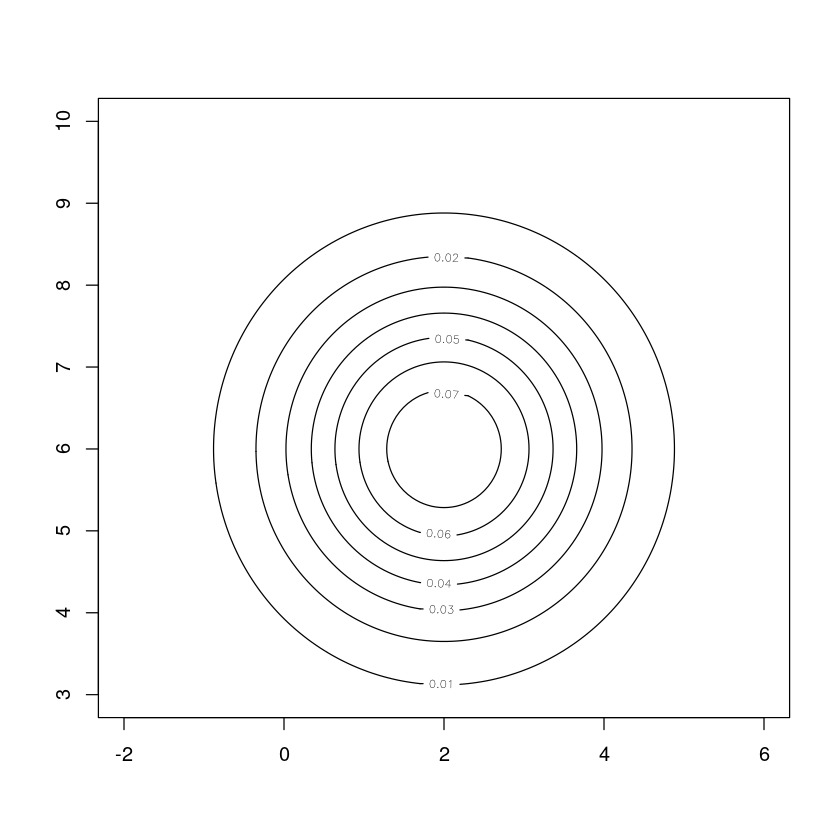

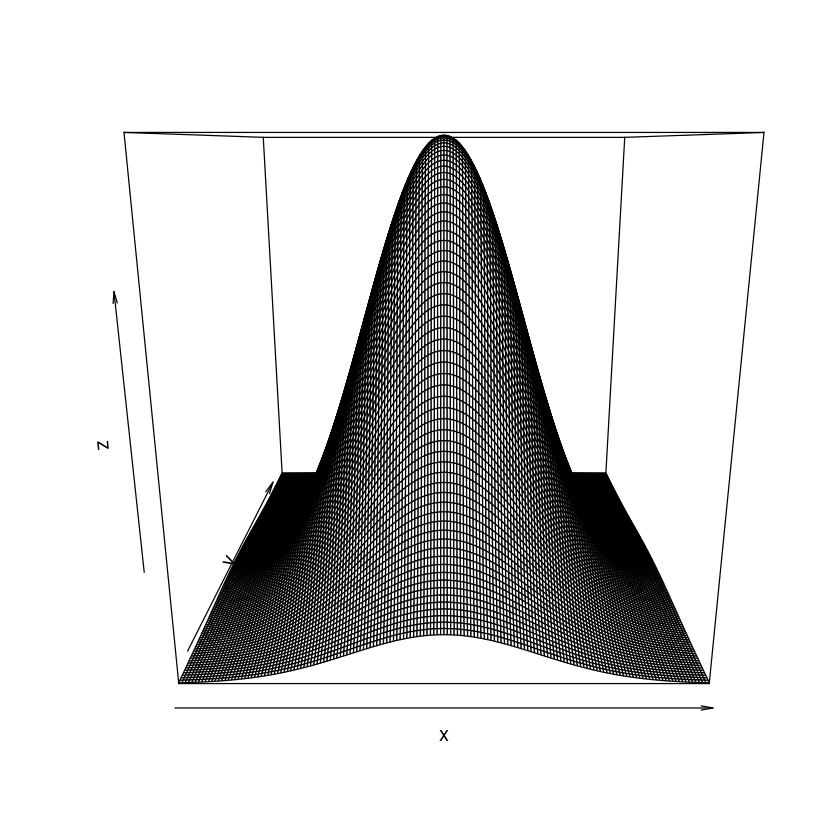

In [15]:
library(mvtnorm)

#A bivariate normal distribution
x = seq(-2, 6, 0.05)
y = seq(3, 10, 0.05)

#specified by mean and the covariance matrix sigma.
mu = c(2, 6)
sigma0 = matrix(c(2, 0, 0, 2), nrow=2)


#dmvnorm computes the density function of the multivariate normal
#dmvnorm(x, mean = mu, sigma = sigma0, log = FALSE, checkSymmetry = TRUE)
f = function(x, y) dmvnorm(cbind(x, y), mu, sigma0)
z = outer(x, y, f)


#A contour plot
contour(x, y, z)


#3d perspective plot
persp(x, y, z)

# Density plots for bivariate data

In [ ]:
Sigma = matrix(c(6,2,2,4),2,2)
Sigma


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




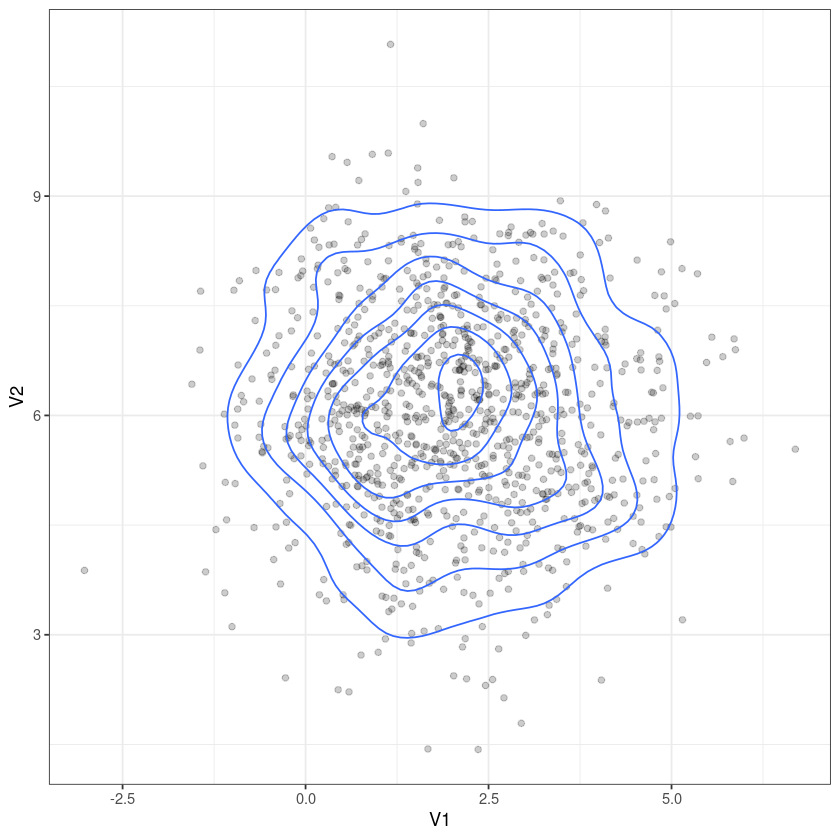

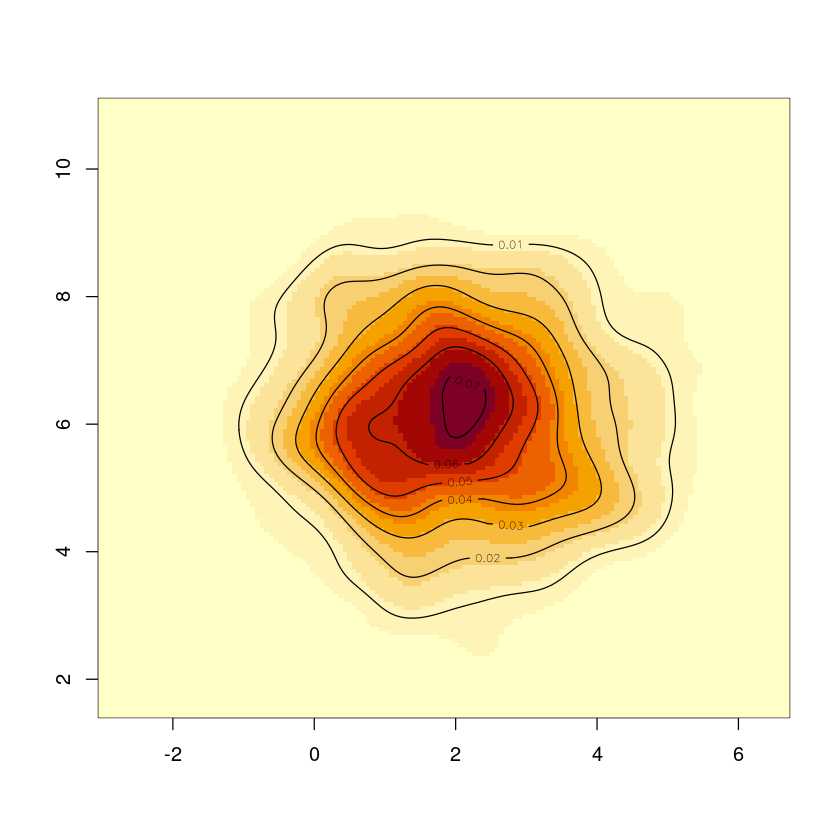

In [17]:
#simulate 1000 observations
library(MASS)
Mdat = mvrnorm(n = 1000, mu,sigma0)
M.dat = as.data.frame(Mdat)
ggplot(M.dat, aes(x=V1, y=V2))+ geom_point(alpha = .2) + geom_density_2d()+theme_bw()


#Bivariate probabality density estimation and plot
b.kde = kde2d(Mdat[,1], Mdat[,2], n = 150)
image(b.kde)
contour(b.kde, add = TRUE)

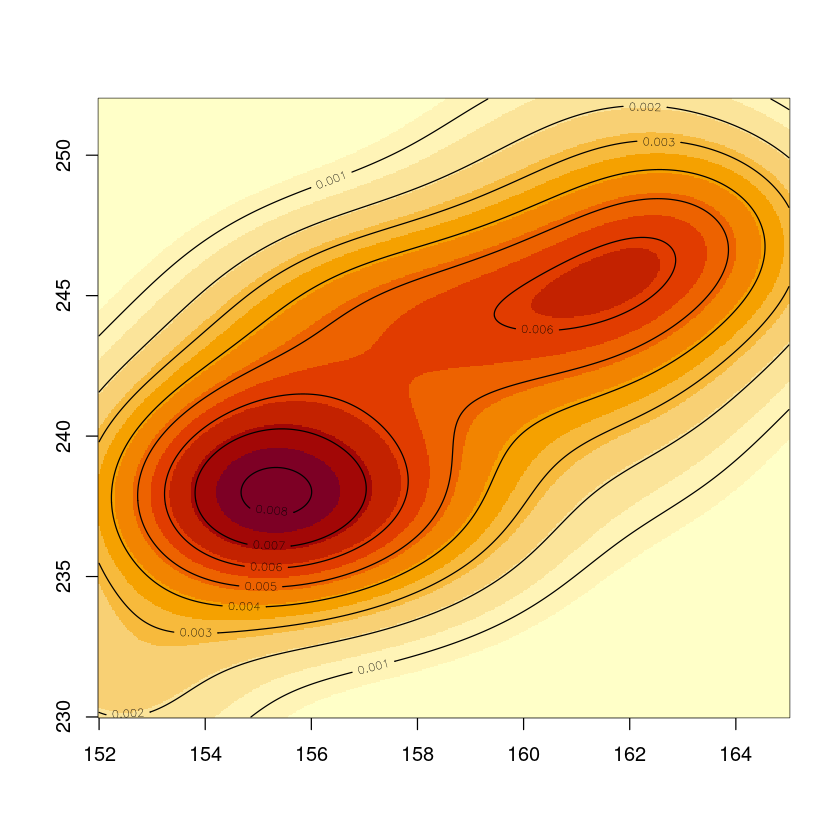

In [18]:
#To make a probablity density plot for Total_length and Alar_extent
#Bivariate probabality density estimation and plot


b.kde = kde2d(dat[,2], dat[,3], n = 500)
image(b.kde)
contour(b.kde, add = TRUE)

#the plot of the probability density is not very reliable when the sample siz

# Mean vector, sample covariance

In [31]:
#To find the mean vector
dat.23 = dat[,2:3]

#Find the mean vector
mean.vec = colMeans(dat.23)

#Find the sample covariance
vco.mat = cov(dat.23)

print(mean.vec)
print(vco.mat)


Total_length  Alar_extent 
    157.9796     241.3265 
             Total_length Alar_extent
Total_length     13.35374    13.61097
Alar_extent      13.61097    25.68282


# bivariate normal distribution

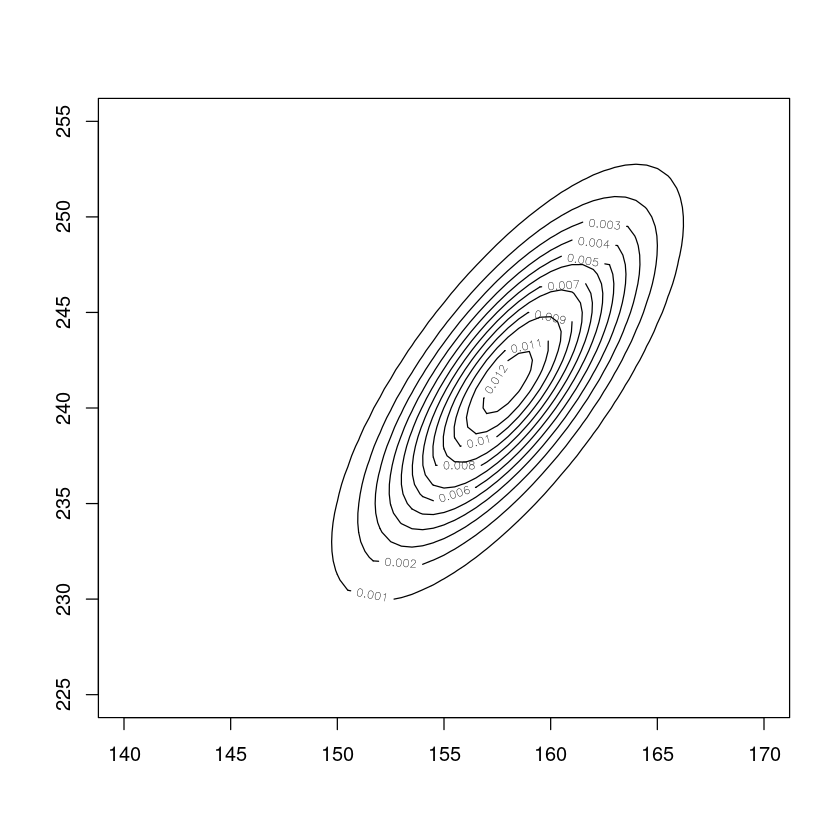

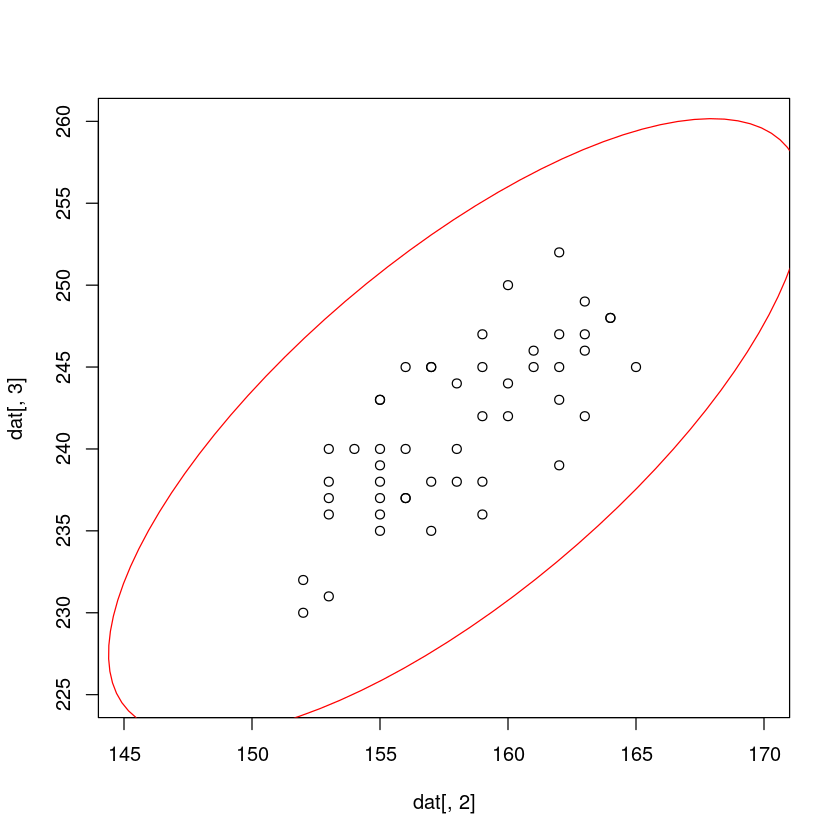

In [33]:
library(mvtnorm) # multivariate normal distribution library
#A bivariate normal distribution
x = seq(140, 170, 0.5) # set the domain
y = seq(225, 255, 0.5) # set the range 

#specified by mean and the covariance matrix sigma.
mu = mean.vec
sigma0 = vco.mat

#dmvnorm computes the density function of the multivariate normal
#dmvnorm(x, mean = mu, sigma = sigma0, log = FALSE, checkSymmetry = TRUE)

f = function(x, y) dmvnorm(cbind(x, y), mu, sigma0)
z = outer(x, y, f)

#A contour plot for the bivariate normal distribution
contour(x, y, z)

library(ellipse)

plot(dat[,2], dat[,3], xlim=c(145, 170), ylim=c(225,260))
lines(ellipse(x=sigma0, center=mu, level = 0.999 ), col="red") # ellips

Warning message in stat_ellipse(fill = 4, alpha = 0.5):
“Ignoring unknown parameters: `fill`”


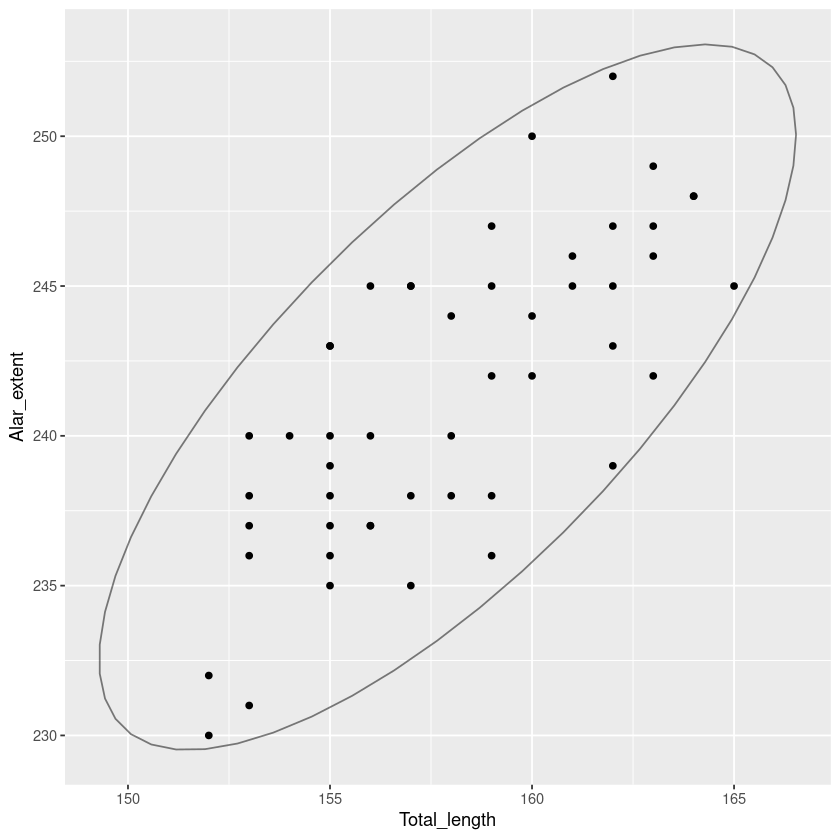

In [23]:
#make a plot for the confidence region
library(ggplot2)
ggplot(dat[,c(2,3)],aes(x=Total_length, y = Alar_extent))+geom_point()+stat_ellipse(fill=4, alpha = 0.5)

# Normality check for multivariate data

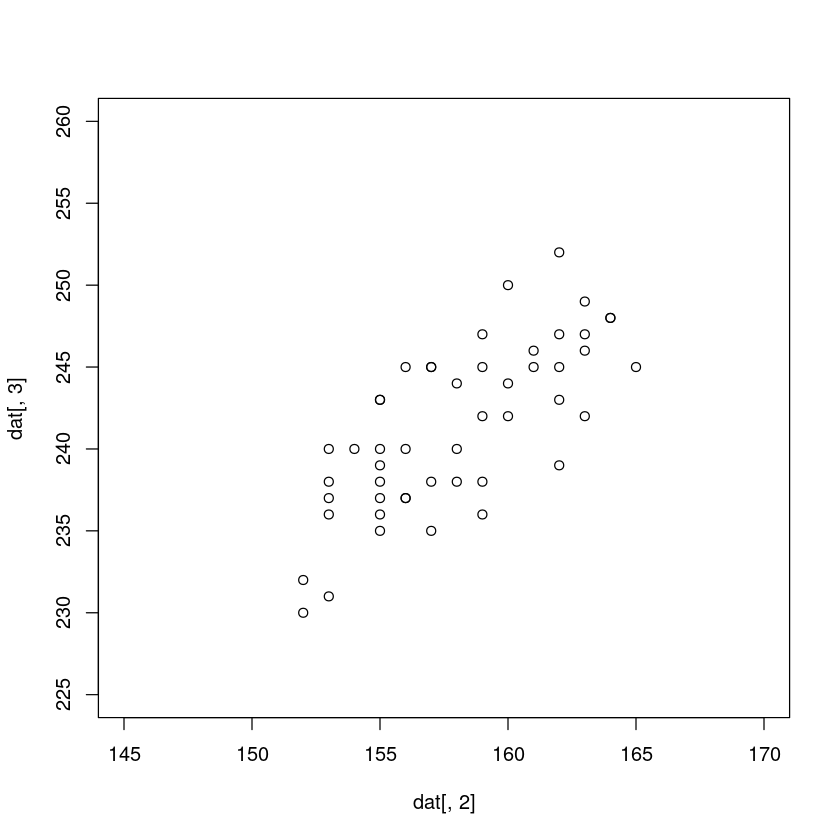

In [28]:
library(ellipse)

#?ellipse

plot(dat[,2],dat[,3],xlim=c(145,170),ylim=c(225,260))
lines(ellipse(x=sigma0, center=mu, level = 0.999),col="red") 

# multivariate QQ normal plot 
- library(psych)
- mardia


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Call: mardia(x = dat[, 2:6])

Mardia tests of multivariate skew and kurtosis
Use describe(x) the to get univariate tests
n.obs = 49   num.vars =  5 
b1p =  4.83   skew =  39.46  with probability  <=  0.28
 small sample skew =  42.73  with probability <=  0.17
b2p =  34.48   kurtosis =  -0.22  with probability <=  0.83

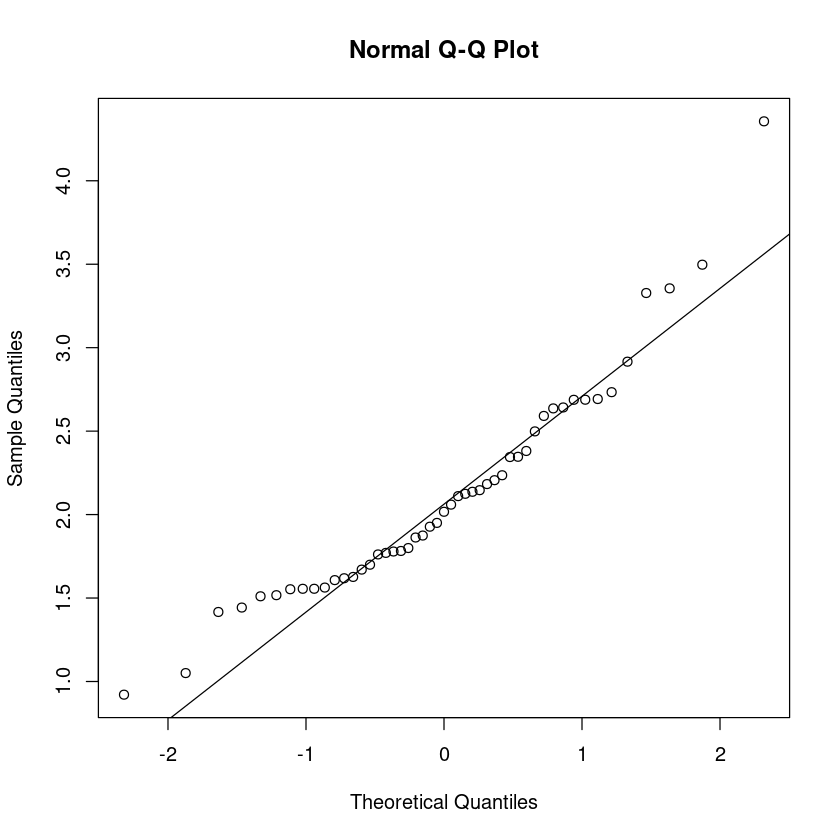

In [27]:
library(psych)
mardia(x=dat[,2:6])

# Linear transformation of a multivariate normal

In [26]:
#Find the variance 

c.vec = c(-1, 0, 1)

cov.matrix = matrix(c(2276, 1508, 813, 1508, 2206, 1349, 813, 1349, 1865), nrow=3, byrow=1)

var.y = t(c.vec) %*% cov.matrix %*% c.vec

var.y


sd.of.y = sqrt(var.y)
print(sd.of.y)

mean.v=c(259.5,230.8,221.5)
mean.y=t(c.vec)%*% mean.v

mean.y

2515


         [,1]
[1,] 50.14978


-38
